# **Linear Regression**

In [ ]:
# Python code on sklearn linear regression example

# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Loading the sklearn diabetes dataset
X, Y = load_diabetes(return_X_y=True)

# Taking only one feature to perform simple linear regression
X = X[:,8].reshape(-1,1)

In [ ]:
# Splitting the dependent and independent features of the dataset into training and testing dataset
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.3, random_state = 10 )

# Creating an instance for the linear regression model of sklearn
lr = LinearRegression()

# Training the model by passing the dependent and independent features of the training dataset
lr.fit( X_train, Y_train )

# Creating an array of predictions made by the model for the unseen or test dataset
Y_pred = lr.predict( X_test )

# The value of the coefficients for the independent feature through the multiple regression model
print("Value of the oefficients: \n", lr.coef_)

# The value of the mean squared error
print(f"Mean square error: {mean_squared_error( Y_test, Y_pred)}")

Value of the oefficients: 
 [875.72295475]
Mean square error: 4254.615583911326


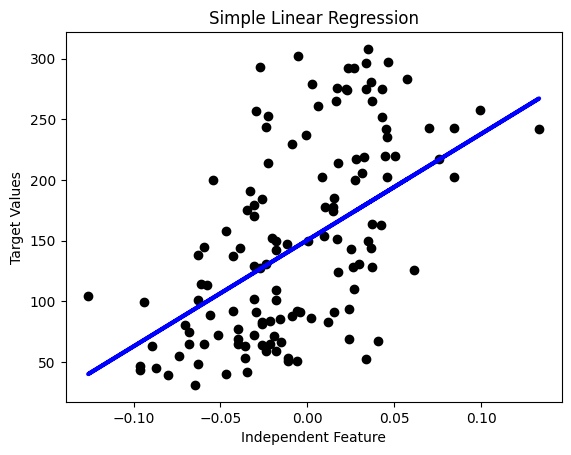

In [ ]:
# Plotting the output
plt.scatter(X_test, Y_test, color = "black", label = "original data")
plt.plot(X_test, Y_pred, color = "blue", linewidth=3, label = "regression line")
plt.xlabel("Independent Feature")
plt.ylabel("Target Values")
plt.title("Simple Linear Regression")
plt.show()

In [ ]:
print(len(X_test))

133


In [ ]:
print(len(Y_pred))

133


# **K - Means**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

In [ ]:
# Function to plot the data points and centroids
def plot_kmeans(X, centroids, idx, iteration):
    plt.scatter(X[:, 0], X[:, 1], c=idx, s=50, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X')
    plt.title(f'Iteration {iteration}')
    plt.show()

# Function to assign each point to the nearest centroid
def assign_clusters(X, centroids):
    idx = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        distances = np.linalg.norm(X[i] - centroids, axis=1)
        idx[i] = np.argmin(distances)
    return idx

# Function to update centroids
def update_centroids(X, idx, k):
    new_centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        points = X[idx == i]
        new_centroids[i] = np.mean(points, axis=0)
    return new_centroids

In [ ]:
# Initialize centroids randomly
k = 4
np.random.seed(42)
centroids = X[np.random.choice(X.shape[0], k, replace=False)]

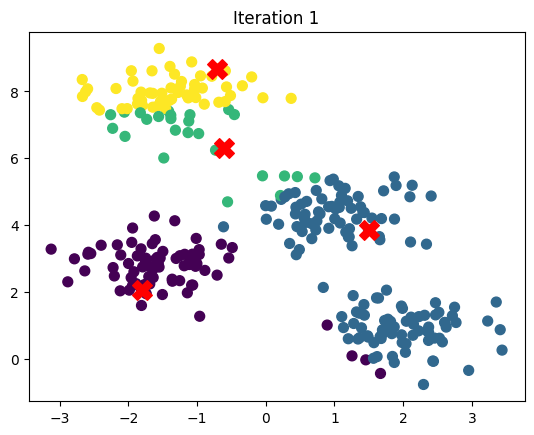

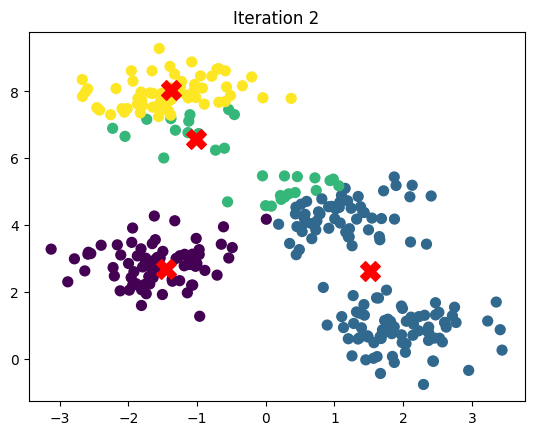

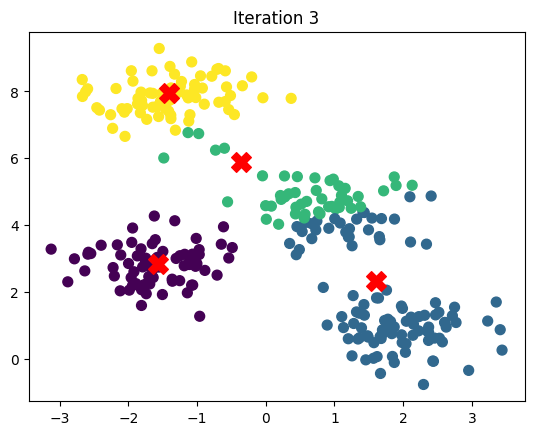

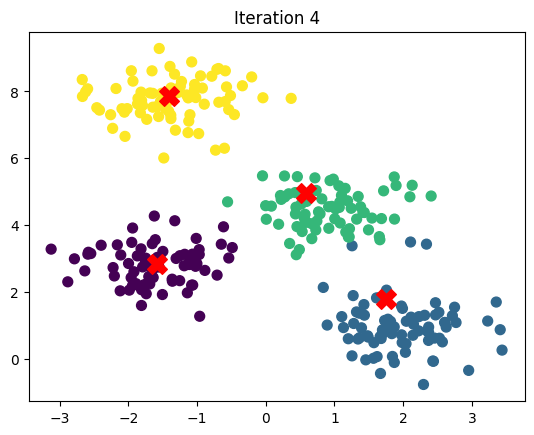

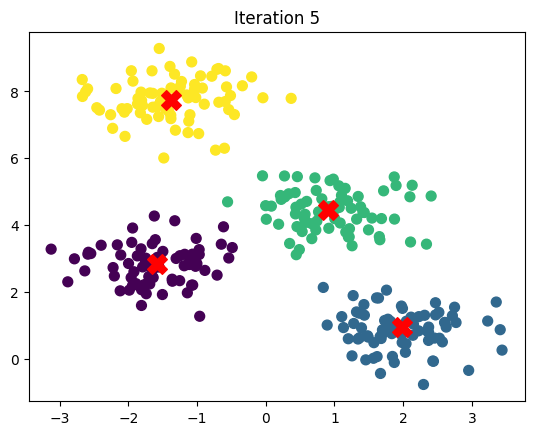

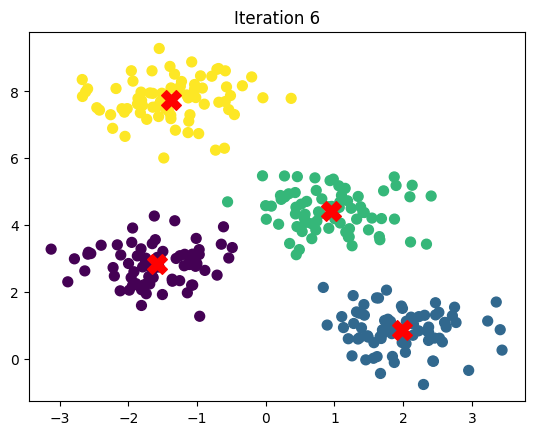

In [ ]:
# K-Means algorithm
max_iterations = 10
for iteration in range(max_iterations):
    # Step 1: Assign clusters
    idx = assign_clusters(X, centroids)

    # Step 2: Plot the current state
    plot_kmeans(X, centroids, idx, iteration + 1)

    # Step 3: Update centroids
    new_centroids = update_centroids(X, idx, k)

    # Check for convergence (if centroids do not change)
    if np.all(centroids == new_centroids):
        break
    centroids = new_centroids

# **KNN**

In [ ]:
#The value of k should always be non-divisible by the number of classes

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Generate sample data
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=2.0)

In [ ]:
# Fit KNN model
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

# Define a new data point
new_point = np.array([[0, 0]])

# Find k nearest neighbors
distances, indices = knn.kneighbors(new_point)

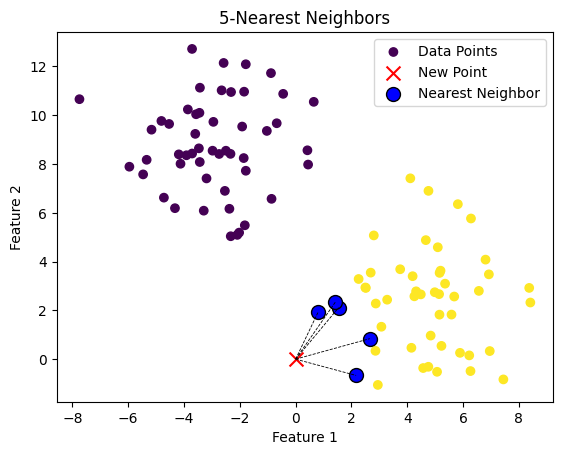

In [ ]:
# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', label='Data Points')
plt.scatter(new_point[0, 0], new_point[0, 1], c='red', marker='x', s=100, label='New Point')

# Highlight k nearest neighbors
for i in range(k):
    neighbor_index = indices[0, i]
    neighbor = X[neighbor_index]
    plt.plot([new_point[0, 0], neighbor[0]], [new_point[0, 1], neighbor[1]], 'k--', linewidth=0.6)
    plt.scatter(neighbor[0], neighbor[1], c='blue', edgecolor='k', s=100, label='Nearest Neighbor' if i == 0 else "")

plt.legend()
plt.title(f'{k}-Nearest Neighbors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# **Decision Tree**

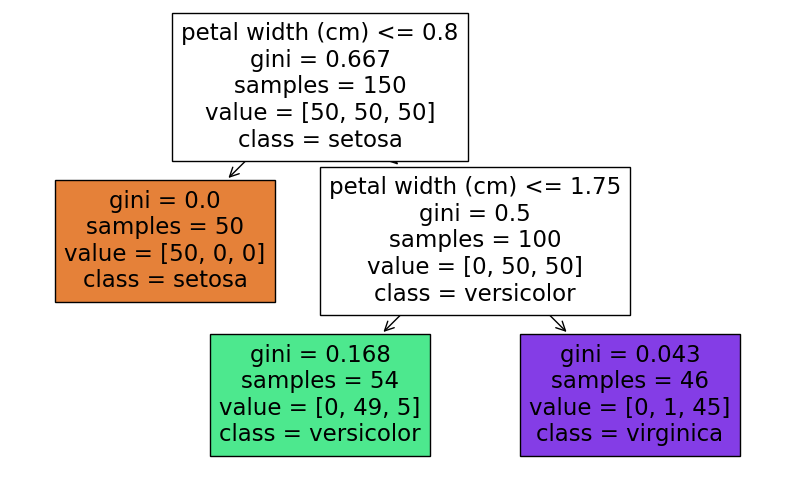

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Load the iris dataset
iris = load_iris()
X = iris.data[:, 2:]  # Use petal length and width
y = iris.target

# Create and train the decision tree classifier
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(10, 6))
plot_tree(tree_clf, feature_names=iris.feature_names[2:], class_names=iris.target_names, filled=True)
plt.show()

# **SVM**

In [ ]:
# Load the important packages
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC

# Load the datasets
cancer = load_breast_cancer()
X = cancer.data[:, :2]
y = cancer.target

#Build the model
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
# Trained the model
svm.fit(X, y)

SVC(gamma=0.5)

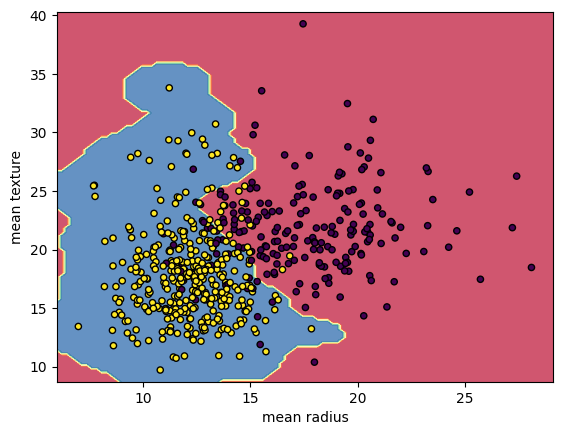

In [ ]:
# Plot Decision Boundary
DecisionBoundaryDisplay.from_estimator(
        svm,
        X,
        response_method="predict",
        cmap=plt.cm.Spectral,
        alpha=0.8,
        xlabel=cancer.feature_names[0],
        ylabel=cancer.feature_names[1],
    )

# Scatter plot
plt.scatter(X[:, 0], X[:, 1],
            c=y,
            s=20, edgecolors="k")
plt.show()

# **Perceptron**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate linearly separable dataset
X, y = make_blobs(n_samples=100, centers=2, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Perceptron classifier
perceptron = Perceptron()

# Train the classifier
perceptron.fit(X_train, y_train)

Perceptron()

Accuracy: 1.0


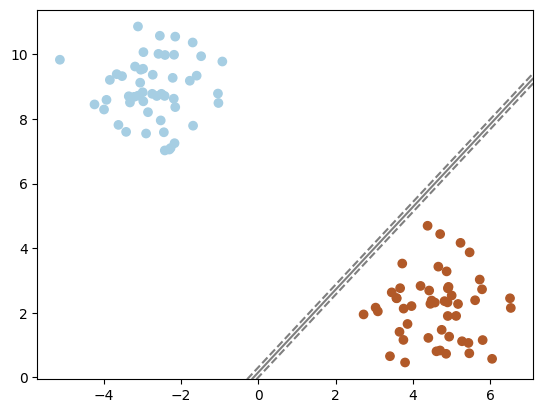

In [ ]:
# Make predictions on the test set
y_pred = perceptron.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = perceptron.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.show()

# **CNN**

170498071/170498071 [==============================] - 10s 0us/step
Epoch 1/10
1563/1563 [==============================] - 78s 49ms/step - loss: 1.5283 - accuracy: 0.4396 - val_loss: 1.2766 - val_accuracy: 0.5508
Epoch 2/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.1681 - accuracy: 0.5826 - val_loss: 1.1546 - val_accuracy: 0.5896
Epoch 3/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.0167 - accuracy: 0.6416 - val_loss: 1.0245 - val_accuracy: 0.6442
Epoch 4/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.9170 - accuracy: 0.6775 - val_loss: 0.9489 - val_accuracy: 0.6703
Epoch 5/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.8400 - accuracy: 0.7057 - val_loss: 0.8907 - val_accuracy: 0.6957
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7744 - accuracy: 0.7284 - val_loss: 0.8569 - val_accuracy: 0.7077
Epoch 7/10
1563/1563 [==============================] - 

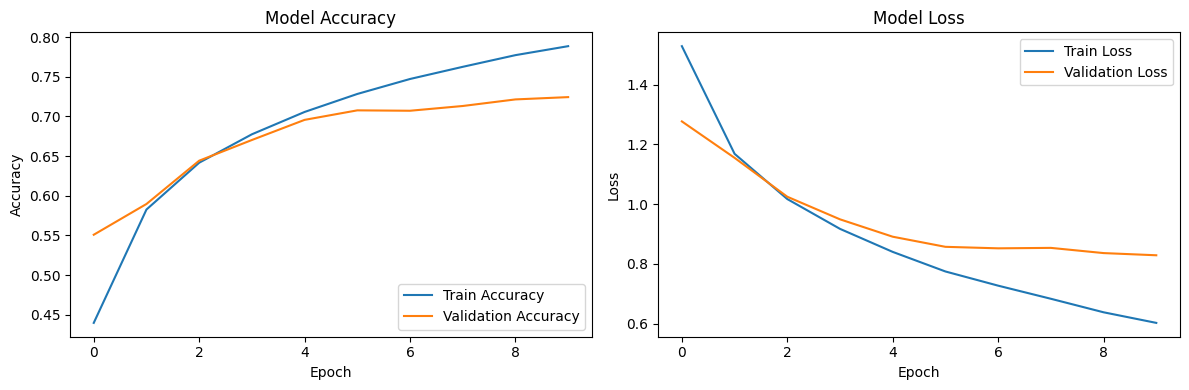

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()
